### Hemolysis and Ventricular Assist Device

In [1]:
## Import libraries
import csv
import re
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
from datetime import datetime
import requests

In [2]:
# PubMed Website URL
baseURL = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%28%22Ventricular+Assist+Device%22%5Btiab%5D+OR+%22VAD%22%5Btiab%5D%29&filter=years.2015-2023'
response = requests.get(baseURL)
print(response)

<Response [200]>


In [3]:
# Interpret response.content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser') #lxml = library to parse HTML and other languages
print(soup)

<!DOCTYPE html>

<html lang="en">
<head itemscope="" itemtype="http://schema.org/WebPage" prefix="og: http://ogp.me/ns#">
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<!-- Mobile properties -->
<meta content="True" name="HandheldFriendly"/>
<meta content="320" name="MobileOptimized"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport"/>
<link href="https://cdn.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.ncbi.nlm.nih.gov" rel="preconnect"/>
<link href="https://www.google-analytics.com" rel="preconnect"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.5ecf62baa0fa.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.452c70ce66f7.css" rel="stylesheet" type="text/css"/>
<link href="https://cdn.ncbi.nlm.nih.gov/pubmed/701f219c-919c-44fd-8672-7a42a1dc3198/CACHE/css/output.55dd827ca

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

# Base URL
base_url = 'https://pubmed.ncbi.nlm.nih.gov/?term=%28%22Hemolysis%22%5Btiab%5D+or+%22blood+damage%22%5Btiab%5D%29+AND+%28%22Ventricular+Assist+Device%22%5Btiab%5D+OR+%22VAD%22%5Btiab%5D%29&filter=years.2015-2023'
# Create a list to hold all data
all_data = []

# Function to scrape a single page
def scrape_page(page_url):
    response = requests.get(page_url)
    if response.status_code != 200:
        print(f"Failed to retrieve page: {page_url}")
        return

    soup = BeautifulSoup(response.content, 'html.parser')
    articles = soup.find_all('div', class_='docsum-content')

    for article in articles:
        # Extract data for each article
        title = article.find('a', class_='docsum-title').text.strip()
        authors = article.find('span', class_='docsum-authors full-authors').text.strip()
        pmid = article.find('span', class_='citation-part').text.strip()

        journal_elem = article.find('span', class_='docsum-journal-citation full-journal-citation')
        journal = journal_elem.text.strip() if journal_elem else ""
        match = re.search(r'\d{4}', journal)
        publication_year = match.group() if match else ""
        cited_by_elem = article.find('ul', class_='articles-list')
        cited_by = cited_by_elem.text.strip() if cited_by_elem else ""

        affiliations_elem = article.find('span', class_='docsum-affiliation')
        affiliations = affiliations_elem.text.strip() if affiliations_elem else ""

        # Append data to all_data list
        all_data.append({
            'Title': title,
            'Authors': authors,
            'Journal': journal,
            'PMID': pmid,
            'Publication_year': publication_year,
            'Affiliations': affiliations,
            'Cited_by': cited_by
        })

# Scrape multiple pages
for page_num in range(1, 24):  # Adjust the range according to the number of pages to scrape
    url = f"{base_url}&page={page_num}"
    scrape_page(url)

# Create a DataFrame from the list of dictionaries
df = pd.DataFrame(all_data)

# Print the DataFrame
print(df)

print(df)


                                                 Title  \
0    Mechanical Left Ventricular Unloading in Patie...   
1    Blood damage in Left Ventricular Assist Device...   
2    Clinical implications of LDH isoenzymes in hem...   
3    Left Ventricular Unloading During Extracorpore...   
4    Microaxial Left Ventricular Assist Device in C...   
..                                                 ...   
216  Successful reduction of plasma free-hemoglobin...   
217  Uncommon Cause of Hemolysis With Rapid Decreas...   
218  Computational Fluid Dynamics-Based Design Opti...   
219  The variational multiscale formulation for the...   
220  Heartmate II Inflow Path Thrombosis: Emphasis ...   

                                               Authors  \
0    Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1    Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2    Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3    Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4    Tan SR, 

In [8]:
num_articles = df.shape[0]  # Extract the number of rows from the shape attribute
print(f"The number of articles in the DataFrame is: {num_articles}")

The number of articles in the DataFrame is: 221


In [9]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [10]:
## Create the URL

baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'
affiliations = requests.get(f'{baseurl} + df.iloc[0:3]')
affiliations

<Response [404]>

In [12]:
## Create a list to get the affiliations_url
affiliations_url = []
for i in range(len(df['PMID'])):
    search_url = f'{baseurl}' + df.iloc[i, 3][6:]
    print(search_url)
    affiliations_url.append(search_url)
affiliations_url

https://pubmed.ncbi.nlm.nih.gov/35361346
https://pubmed.ncbi.nlm.nih.gov/30354870
https://pubmed.ncbi.nlm.nih.gov/31494952
https://pubmed.ncbi.nlm.nih.gov/30765031
https://pubmed.ncbi.nlm.nih.gov/36295065
https://pubmed.ncbi.nlm.nih.gov/31039274
https://pubmed.ncbi.nlm.nih.gov/26643646
https://pubmed.ncbi.nlm.nih.gov/28579115
https://pubmed.ncbi.nlm.nih.gov/32843935
https://pubmed.ncbi.nlm.nih.gov/30297071
https://pubmed.ncbi.nlm.nih.gov/33571008
https://pubmed.ncbi.nlm.nih.gov/35236108
https://pubmed.ncbi.nlm.nih.gov/31328604
https://pubmed.ncbi.nlm.nih.gov/36347061
https://pubmed.ncbi.nlm.nih.gov/35912874
https://pubmed.ncbi.nlm.nih.gov/31444074
https://pubmed.ncbi.nlm.nih.gov/29734259
https://pubmed.ncbi.nlm.nih.gov/33253314
https://pubmed.ncbi.nlm.nih.gov/28007073
https://pubmed.ncbi.nlm.nih.gov/26164600
https://pubmed.ncbi.nlm.nih.gov/37476687
https://pubmed.ncbi.nlm.nih.gov/36556366
https://pubmed.ncbi.nlm.nih.gov/27079416
https://pubmed.ncbi.nlm.nih.gov/35988210
https://pubmed.n

['https://pubmed.ncbi.nlm.nih.gov/35361346',
 'https://pubmed.ncbi.nlm.nih.gov/30354870',
 'https://pubmed.ncbi.nlm.nih.gov/31494952',
 'https://pubmed.ncbi.nlm.nih.gov/30765031',
 'https://pubmed.ncbi.nlm.nih.gov/36295065',
 'https://pubmed.ncbi.nlm.nih.gov/31039274',
 'https://pubmed.ncbi.nlm.nih.gov/26643646',
 'https://pubmed.ncbi.nlm.nih.gov/28579115',
 'https://pubmed.ncbi.nlm.nih.gov/32843935',
 'https://pubmed.ncbi.nlm.nih.gov/30297071',
 'https://pubmed.ncbi.nlm.nih.gov/33571008',
 'https://pubmed.ncbi.nlm.nih.gov/35236108',
 'https://pubmed.ncbi.nlm.nih.gov/31328604',
 'https://pubmed.ncbi.nlm.nih.gov/36347061',
 'https://pubmed.ncbi.nlm.nih.gov/35912874',
 'https://pubmed.ncbi.nlm.nih.gov/31444074',
 'https://pubmed.ncbi.nlm.nih.gov/29734259',
 'https://pubmed.ncbi.nlm.nih.gov/33253314',
 'https://pubmed.ncbi.nlm.nih.gov/28007073',
 'https://pubmed.ncbi.nlm.nih.gov/26164600',
 'https://pubmed.ncbi.nlm.nih.gov/37476687',
 'https://pubmed.ncbi.nlm.nih.gov/36556366',
 'https://

In [14]:
# Create a DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Print the list of PMIDs
#print(pmids_list)

In [15]:
import requests
from bs4 import BeautifulSoup

# Base URL for PubMed
baseurl = 'https://pubmed.ncbi.nlm.nih.gov/'

# Initialize empty lists to store all affiliations and cited_by
affiliations_list = []
cited_by_list = []

# DataFrame 'df' with a column 'PMID'
pmids_list = df['PMID'].tolist()

# Loop through each pmid in the pmids_list
for pmid in pmids_list:
    # Construct the URL for each PubMed ID
    url = baseurl + f'?term={pmid}'

    # Send a GET request to the URL
    response = requests.get(url)

    if response.status_code == 200:
        # Parse the content of the request with BeautifulSoup
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the ul element with class "item-list" for affiliations
        ul_element = soup.find('ul', class_='item-list')

        # Extract and process the affiliations
        if ul_element:
            # Find all the li elements within the ul element
            li_elements = ul_element.find_all('li')

            # Extracting the affiliations as a single string
            affiliations = ", ".join([li.text for li in li_elements])
            affiliations_list.append(affiliations)
        else:
            # Find the affiliation element if the 'item-list' is not found
            affiliation_element = soup.find('div', class_='affiliations')

            if affiliation_element:
                affiliations_list.append(affiliation_element.text.strip())
            else:
                affiliations_list.append("No affiliations found")

        # Find the ul element with class "articles-list" for cited_by
        articles_list_element = soup.find('ul', class_='articles-list')

        # Extract and process the cited_by
        if articles_list_element:
            articles = articles_list_element.find_all('li')
            cited_by = ", ".join([article.text for article in articles])
            if cited_by.strip():
                cited_by_list.append(cited_by)
        else:
            cited_by_list.append("No cited by information found")
    else:
        print(f"Failed to retrieve {url}. Status code: {response.status_code}")

# Print all the extracted affiliations
for affiliation in affiliations_list:
    print(affiliation)

# Print all the extracted cited_by
for cited_by in cited_by_list:
    print(cited_by)

1 Division of Cardiovascular Medicine, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA; Smith Center for Outcomes Research in Cardiology, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA. Electronic address: wgrandin@bidmc.harvard.edu., 2 Department of Medicine. Montefiore Medical Center, Bronx, New York, USA., 3 Division of Cardiovascular Medicine, UMass Memorial Medical Center, Worcester, Massachusetts, USA., 4 Smith Center for Outcomes Research in Cardiology, Beth Israel Deaconess Medical Center, Boston, Massachusetts, USA., 5 Extracorporeal Life Support Organization, Ann Arbor, Michigan, USA., 6 Extracorporeal Life Support Organization, Ann Arbor, Michigan, USA; Division of Cardiothoracic Surgery and Emergency Medicine, University of Utah, Salt Lake City, Utah, USA., 7 The Cardiovascular Center, Tufts Medical Center, Boston, Massachusetts, USA., 8 Division of Anesthesia and Critical Care, Beth Israel Deaconess Medical Center, Boston, Massachusetts, 

In [16]:
import pandas as pd

# Make sure the length of the lists matches the length of df['PMID']
if len(affiliations_list) == len(df) and len(cited_by_list) == len(df):
    # Add the affiliations_list and cited_by_list as new columns to the DataFrame
    df['Affiliations'] = affiliations_list
    df['Cited_By'] = cited_by_list
else:
    print("Lengths of the lists do not match the length of the DataFrame.")

# Display the updated DataFrame with new columns
print(df)

                                                 Title  \
0    Mechanical Left Ventricular Unloading in Patie...   
1    Blood damage in Left Ventricular Assist Device...   
2    Clinical implications of LDH isoenzymes in hem...   
3    Left Ventricular Unloading During Extracorpore...   
4    Microaxial Left Ventricular Assist Device in C...   
..                                                 ...   
216  Successful reduction of plasma free-hemoglobin...   
217  Uncommon Cause of Hemolysis With Rapid Decreas...   
218  Computational Fluid Dynamics-Based Design Opti...   
219  The variational multiscale formulation for the...   
220  Heartmate II Inflow Path Thrombosis: Emphasis ...   

                                               Authors  \
0    Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1    Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2    Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3    Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4    Tan SR, 

In [17]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_by,Cited_By
0,Mechanical Left Ventricular Unloading in Patie...,"Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...",J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...,PMID: 35361346,2022,"1 Division of Cardiovascular Medicine, Beth Is...",,\n\n\n \n Clinical efficacy of dir...
1,Blood damage in Left Ventricular Assist Device...,"Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...",Int J Artif Organs. 2019 Mar;42(3):113-124. do...,PMID: 30354870,2019,"1 1 Department of Electronics, Information and...",,\n\n\n \n Role of computed tomogra...
2,Clinical implications of LDH isoenzymes in hem...,"Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...",Artif Organs. 2020 Mar;44(3):231-238. doi: 10....,PMID: 31494952,2020,"1 Division of Cardiac Surgery, Thomas Jefferso...",,\n\n\n \n Discriminatory performan...
3,Left Ventricular Unloading During Extracorpore...,"Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...",J Am Coll Cardiol. 2019 Feb 19;73(6):654-662. ...,PMID: 30765031,2019,"1 University of Ottawa Heart Institute, Ottawa...",,\n\n\n \n Prevention and treatment...
4,Microaxial Left Ventricular Assist Device in C...,"Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...",Life (Basel). 2022 Oct 18;12(10):1629. doi: 10...,PMID: 36295065,2022,"1 Yong Loo Lin School of Medicine, National Un...",,\n\n\n \n Association of Use of an...
...,...,...,...,...,...,...,...,...
216,Successful reduction of plasma free-hemoglobin...,"Hayes C, Shafi H, Mason H, Klapper E.",Transfus Apher Sci. 2016 Apr;54(2):253-5. doi:...,PMID: 26388049,2016,1 Department of Pathology and Laboratory Medic...,,\n\n\n \n Plasma exchange in a 13-...
217,Uncommon Cause of Hemolysis With Rapid Decreas...,"Nordan T, Ortoleva J, Chen FY, Kapur NK, Coupe...",Circ Heart Fail. 2021 Jan;14(1):e007312. doi: ...,PMID: 33435696,2021,"1 Department of Cardiac Surgery (T.N., F.Y.C.,...",,\n\n\n \n Diagnosis of hemolysis a...
218,Computational Fluid Dynamics-Based Design Opti...,"Yu H, Janiga G, Thévenin D.",Artif Organs. 2016 Apr;40(4):341-52. doi: 10.1...,PMID: 26526039,2016,1 Laboratory of Fluid Dynamics & Technical Flo...,,\n\n\n \n Shape optimization of th...
219,The variational multiscale formulation for the...,"Haßler S, Pauli L, Behr M.",Int J Numer Method Biomed Eng. 2019 Dec;35(12)...,PMID: 31493337,2019,1 Chair for Computational Analysis of Technica...,,\n\n\n \n Weakly imposed boundary ...


In [18]:
# Assuming df is your DataFrame

# Drop the 'Cited_by' column
df.drop(columns='Cited_by', inplace=True)

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Mechanical Left Ventricular Unloading in Patie...   
1    Blood damage in Left Ventricular Assist Device...   
2    Clinical implications of LDH isoenzymes in hem...   
3    Left Ventricular Unloading During Extracorpore...   
4    Microaxial Left Ventricular Assist Device in C...   
..                                                 ...   
216  Successful reduction of plasma free-hemoglobin...   
217  Uncommon Cause of Hemolysis With Rapid Decreas...   
218  Computational Fluid Dynamics-Based Design Opti...   
219  The variational multiscale formulation for the...   
220  Heartmate II Inflow Path Thrombosis: Emphasis ...   

                                               Authors  \
0    Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1    Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2    Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3    Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4    Tan SR, 

In [19]:
# Clean up the 'Cited_By' column by stripping newline and excess whitespace characters
df['Cited_By'] = df['Cited_By'].apply(lambda x: x.strip())

# Display the updated DataFrame
print(df)

                                                 Title  \
0    Mechanical Left Ventricular Unloading in Patie...   
1    Blood damage in Left Ventricular Assist Device...   
2    Clinical implications of LDH isoenzymes in hem...   
3    Left Ventricular Unloading During Extracorpore...   
4    Microaxial Left Ventricular Assist Device in C...   
..                                                 ...   
216  Successful reduction of plasma free-hemoglobin...   
217  Uncommon Cause of Hemolysis With Rapid Decreas...   
218  Computational Fluid Dynamics-Based Design Opti...   
219  The variational multiscale formulation for the...   
220  Heartmate II Inflow Path Thrombosis: Emphasis ...   

                                               Authors  \
0    Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1    Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2    Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3    Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4    Tan SR, 

In [20]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Mechanical Left Ventricular Unloading in Patie...,"Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...",J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...,PMID: 35361346,2022,"1 Division of Cardiovascular Medicine, Beth Is...",Clinical efficacy of direct or indirect left v...
1,Blood damage in Left Ventricular Assist Device...,"Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...",Int J Artif Organs. 2019 Mar;42(3):113-124. do...,PMID: 30354870,2019,"1 1 Department of Electronics, Information and...",Role of computed tomography angiography for He...
2,Clinical implications of LDH isoenzymes in hem...,"Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...",Artif Organs. 2020 Mar;44(3):231-238. doi: 10....,PMID: 31494952,2020,"1 Division of Cardiac Surgery, Thomas Jefferso...",Discriminatory performance of positive urine h...
3,Left Ventricular Unloading During Extracorpore...,"Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...",J Am Coll Cardiol. 2019 Feb 19;73(6):654-662. ...,PMID: 30765031,2019,"1 University of Ottawa Heart Institute, Ottawa...",Prevention and treatment of pulmonary congesti...
4,Microaxial Left Ventricular Assist Device in C...,"Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...",Life (Basel). 2022 Oct 18;12(10):1629. doi: 10...,PMID: 36295065,2022,"1 Yong Loo Lin School of Medicine, National Un...",Association of Use of an Intravascular Microax...
...,...,...,...,...,...,...,...
216,Successful reduction of plasma free-hemoglobin...,"Hayes C, Shafi H, Mason H, Klapper E.",Transfus Apher Sci. 2016 Apr;54(2):253-5. doi:...,PMID: 26388049,2016,1 Department of Pathology and Laboratory Medic...,Plasma exchange in a 13-year-old male with acu...
217,Uncommon Cause of Hemolysis With Rapid Decreas...,"Nordan T, Ortoleva J, Chen FY, Kapur NK, Coupe...",Circ Heart Fail. 2021 Jan;14(1):e007312. doi: ...,PMID: 33435696,2021,"1 Department of Cardiac Surgery (T.N., F.Y.C.,...",Diagnosis of hemolysis and device thrombosis w...
218,Computational Fluid Dynamics-Based Design Opti...,"Yu H, Janiga G, Thévenin D.",Artif Organs. 2016 Apr;40(4):341-52. doi: 10.1...,PMID: 26526039,2016,1 Laboratory of Fluid Dynamics & Technical Flo...,Shape optimization of the diffuser blade of an...
219,The variational multiscale formulation for the...,"Haßler S, Pauli L, Behr M.",Int J Numer Method Biomed Eng. 2019 Dec;35(12)...,PMID: 31493337,2019,1 Chair for Computational Analysis of Technica...,Weakly imposed boundary conditions for shear-r...


In [21]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


In [82]:
## Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [83]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS\Hemolysis_VAD.csv'

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Mechanical Left Ventricular Unloading in Patie...   
1  Blood damage in Left Ventricular Assist Device...   
2  Clinical implications of LDH isoenzymes in hem...   
3  Left Ventricular Unloading During Extracorpore...   
4  Microaxial Left Ventricular Assist Device in C...   

                                             Authors  \
0  Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1  Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2  Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3  Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4  Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...   

                                             Journal            PMID  \
0  J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...  PMID: 35361346   
1  Int J Artif Organs. 2019 Mar;42(3):113-124. do...  PMID: 30354870   
2  Artif Organs. 2020 Mar;44(3):231-238. doi: 10....  PMID: 31494952   
3  J Am Coll Cardiol. 2019 Feb 19;73(6

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Title             221 non-null    object
 1   Authors           221 non-null    object
 2   Journal           221 non-null    object
 3   PMID              221 non-null    object
 4   Publication_year  221 non-null    int64 
 5   Affiliations      221 non-null    object
 6   Cited_By          221 non-null    object
dtypes: int64(1), object(6)
memory usage: 12.2+ KB


In [85]:
df.describe()

,Publication_year
count,221.000000
mean,2019.040724
std,2.510554
min,2015.000000
25%,2017.000000
50%,2019.000000
75%,2021.000000
max,2023.000000


In [86]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

In [87]:
df

,Title,Authors,Journal,PMID,Publication_year,Affiliations,Cited_By
0,Mechanical Left Ventricular Unloading in Patie...,"Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...",J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...,PMID: 35361346,2022,"1 Division of Cardiovascular Medicine, Beth Is...",Clinical efficacy of direct or indirect left v...
1,Blood damage in Left Ventricular Assist Device...,"Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...",Int J Artif Organs. 2019 Mar;42(3):113-124. do...,PMID: 30354870,2019,"1 Department of Electronics, Information and ...",Role of computed tomography angiography for He...
2,Clinical implications of LDH isoenzymes in hem...,"Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...",Artif Organs. 2020 Mar;44(3):231-238. doi: 10....,PMID: 31494952,2020,"1 Division of Cardiac Surgery, Thomas Jefferso...",Discriminatory performance of positive urine h...
3,Left Ventricular Unloading During Extracorpore...,"Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...",J Am Coll Cardiol. 2019 Feb 19;73(6):654-662. ...,PMID: 30765031,2019,"1 University of Ottawa Heart Institute, Ottawa...",Prevention and treatment of pulmonary congesti...
4,Microaxial Left Ventricular Assist Device in C...,"Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...",Life (Basel). 2022 Oct 18;12(10):1629. doi: 10...,PMID: 36295065,2022,"1 Yong Loo Lin School of Medicine, National Un...",Association of Use of an Intravascular Microax...
...,...,...,...,...,...,...,...
216,Successful reduction of plasma free-hemoglobin...,"Hayes C, Shafi H, Mason H, Klapper E.",Transfus Apher Sci. 2016 Apr;54(2):253-5. doi:...,PMID: 26388049,2016,1 Department of Pathology and Laboratory Medic...,Plasma exchange in a 13-year-old male with acu...
217,Uncommon Cause of Hemolysis With Rapid Decreas...,"Nordan T, Ortoleva J, Chen FY, Kapur NK, Coupe...",Circ Heart Fail. 2021 Jan;14(1):e007312. doi: ...,PMID: 33435696,2021,"1 Department of Cardiac Surgery (T.N., F.Y.C.,...",Diagnosis of hemolysis and device thrombosis w...
218,Computational Fluid Dynamics-Based Design Opti...,"Yu H, Janiga G, Thévenin D.",Artif Organs. 2016 Apr;40(4):341-52. doi: 10.1...,PMID: 26526039,2016,1 Laboratory of Fluid Dynamics & Technical Flo...,Shape optimization of the diffuser blade of an...
219,The variational multiscale formulation for the...,"Haßler S, Pauli L, Behr M.",Int J Numer Method Biomed Eng. 2019 Dec;35(12)...,PMID: 31493337,2019,1 Chair for Computational Analysis of Technica...,Weakly imposed boundary conditions for shear-r...


In [88]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Title               0
Authors             0
Journal             0
PMID                0
Publication_year    0
Affiliations        0
Cited_By            0
dtype: int64

In [89]:
# Clean text data by removing extra spaces and converting to lowercase
df['Title'] = df['Title'].str.strip().str.lower()
df['Authors'] = df['Authors'].str.strip().str.lower()
df['Journal'] = df['Journal'].str.strip().str.lower()
df['Affiliations'] = df['Affiliations'].str.strip().str.lower()
df['Cited_By'] = df['Cited_By'].str.strip().str.lower()

In [90]:
# Let's inspect the first few entries in the 'Affiliations' column to understand the format
df['Affiliations'].head()

0    1 division of cardiovascular medicine, beth is...
1    1  department of electronics, information and ...
2    1 division of cardiac surgery, thomas jefferso...
3    1 university of ottawa heart institute, ottawa...
4    1 yong loo lin school of medicine, national un...
Name: Affiliations, dtype: object

In [91]:
import re

def count_affiliations(text):
    """
    Count the number of affiliations in the affiliation text.
    The pattern is assumed to be a digit followed by a space and the affiliation text.
    """
    # Counting occurrences of the pattern
    return len(re.findall(r'\d\s', text))

# Applying the function to the 'Affiliations' column to count affiliations
df['Affiliations_count'] = df['Affiliations'].apply(count_affiliations)

# Finding the maximum number of affiliations
max_affiliations_in_dataset = df['Affiliations_count'].max()
max_affiliations_in_dataset


21

In [92]:
# Finding the publication(s) with the maximum number of affiliations (21)
publications_with_max_affiliations = df[df['Affiliations_count'] == max_affiliations_in_dataset]

# Displaying these publications
publications_with_max_affiliations[['Title', 'Authors', 'Journal', 'PMID', 'Publication_year', 'Affiliations']]

,Title,Authors,Journal,PMID,Publication_year,Affiliations
47,management of bleeding and hemolysis during pe...,"van edom cj, gramegna m, baldetti l, beneduce ...",jacc cardiovasc interv. 2023 jul 24;16(14):170...,PMID: 37495347,2023,"1 department of cardiovascular diseases, unive..."


In [96]:
import pandas as pd
import re

# Load the original dataset
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/Updated_Hemolysis_VAD.csv'  
df = pd.read_csv(file_path)

# Function to split affiliations correctly
def correctly_split_affiliations(text):
    return re.split(r'\.,\s(?=\d)', text)

# Applying the function to split affiliations
split_affiliations = df['Affiliations'].apply(correctly_split_affiliations)

# Find the maximum number of affiliations
max_affiliations = max(split_affiliations.apply(len))

# Creating new columns for each affiliation
for i in range(max_affiliations):
    df[f'Affiliation_{i+1}'] = split_affiliations.apply(lambda x: x[i] if i < len(x) else '')

# Drop the original 'Affiliations' column if you don't need it
df.drop('Affiliations', axis=1, inplace=True)

# Save the updated DataFrame to a new CSV file
output_file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/updated_Hemolysis_VAD_dataset.csv' 
df.to_csv(output_file_path, index=False)


In [97]:
import pandas as pd

# Path to the CSV file
file_path = r'C:\Users\Mitcheyla$\DAPP\Desktop\Fall Semester 2023\FDA Internship\NEW DATASETS/Datasets/updated_Hemolysis_VAD_dataset.csv' 

# Load the dataset
df = pd.read_csv(file_path)

# Print the first few rows of the DataFrame to confirm it's loaded correctly
print(df.head())

                                               Title  \
0  Mechanical Left Ventricular Unloading in Patie...   
1  Blood damage in Left Ventricular Assist Device...   
2  Clinical implications of LDH isoenzymes in hem...   
3  Left Ventricular Unloading During Extracorpore...   
4  Microaxial Left Ventricular Assist Device in C...   

                                             Authors  \
0  Grandin EW, Nunez JI, Willar B, Kennedy K, Ryc...   
1  Selmi M, Chiu WC, Chivukula VK, Melisurgo G, B...   
2  Gordon JS, Wood CT, Luc JGY, Watson RA, Maynes...   
3  Russo JJ, Aleksova N, Pitcher I, Couture E, Pa...   
4  Tan SR, Low CJW, Ng WL, Ling RR, Tan CS, Lim S...   

                                             Journal            PMID  \
0  J Am Coll Cardiol. 2022 Apr 5;79(13):1239-1250...  PMID: 35361346   
1  Int J Artif Organs. 2019 Mar;42(3):113-124. do...  PMID: 30354870   
2  Artif Organs. 2020 Mar;44(3):231-238. doi: 10....  PMID: 31494952   
3  J Am Coll Cardiol. 2019 Feb 19;73(6

In [98]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
if duplicates > 0:
    print(f"Found {duplicates} duplicates.")
else:
    print("No duplicates found.")

No duplicates found.


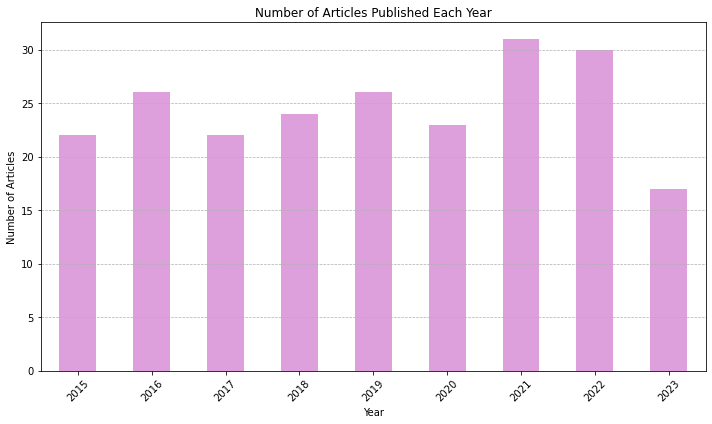

Publication_year
2015    22
2016    26
2017    22
2018    24
2019    26
2020    23
2021    31
2022    30
2023    17
dtype: int64

In [101]:
# Question 1: "How many articles are published each year, and is there a trend over time?"

import matplotlib.pyplot as plt

# Group the data by 'Publication_year' and count the number of articles per year
articles_per_year = df.groupby('Publication_year').size()

# Plot the number of articles published each year
plt.figure(figsize=(10, 6))
articles_per_year.plot(kind='bar', color='plum')
plt.title('Number of Articles Published Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Also, return the data for exact numbers
articles_per_year

In [102]:
import re

# clean the journal names
def clean_journal_name(journal_entry):
    # Remove DOI and any text following it
    journal_entry = re.sub(r'\. doi:.*', '', journal_entry)
    
    # Remove any trailing date information or other details after the journal name
    journal_entry = re.sub(r'\. \d{4}.*', '', journal_entry)
    
    # Remove any additional details that come after a period that are not part of the journal name
    journal_entry = re.sub(r'\..*', '', journal_entry)
    
    # Remove any text in parentheses or brackets at the end
    journal_entry = re.sub(r'[\(\[].*?[\)\]]', '', journal_entry)
    
    # Remove any remaining digits and punctuation at the end of the string
    journal_entry = re.sub(r'[\d\.,;:-]+\s*$', '', journal_entry)
    
    # Trim white spaces at the beginning and end
    journal_entry = journal_entry.strip()
    
    return journal_entry

# Apply the cleaning function to the 'Journal' column
df['Cleaned_Journal'] = df['Journal'].apply(clean_journal_name)

# Check the results
cleaned_journals = df['Cleaned_Journal'].value_counts()
cleaned_journals.head(10)

Artif Organs                           35
ASAIO J                                22
Int J Artif Organs                     18
J Heart Lung Transplant                11
J Artif Organs                          8
J Thorac Cardiovasc Surg                7
J Card Surg                             5
Circ Heart Fail                         5
Annu Int Conf IEEE Eng Med Biol Soc     4
JACC Heart Fail                         3
Name: Cleaned_Journal, dtype: int64

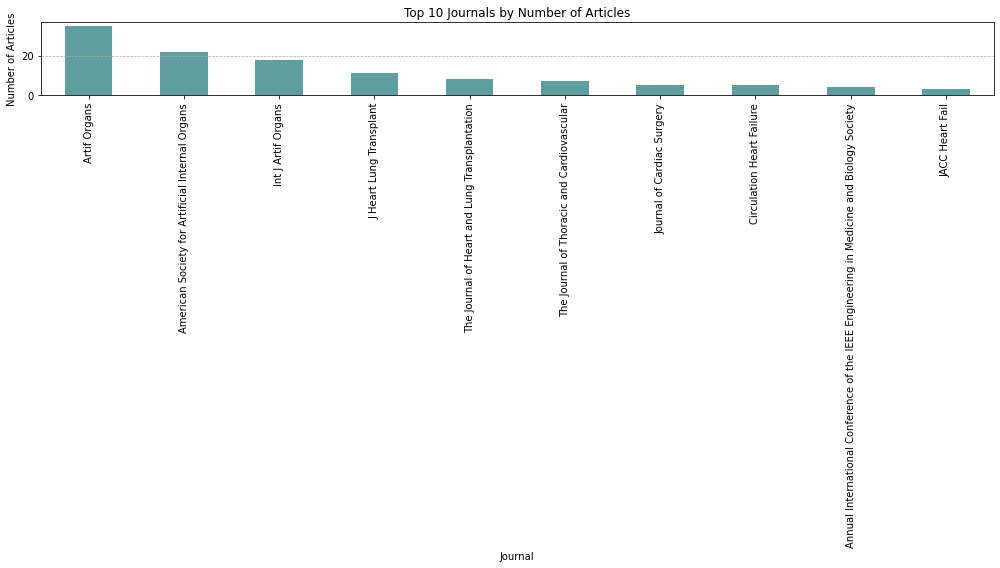

In [104]:
# Questions 2: Which journals are the most common for these articles?"

# Re-defining the mapping of abbreviated journal names to their full names
full_name_mapping = {
    "artif organs": "Artificial Organs",
    "ASAIO J": "American Society for Artificial Internal Organs",
    "int j artif organs": "The International of Artificial Organs",
    "J Artif Organs": "The Journal of Heart and Lung Transplantation",
    "J Thorac Cardiovasc Surg": "The Journal of Thoracic and Cardiovascular",
    "J Card Surg": "Journal of Cardiac Surgery",
    "Circ Heart Fail": "Circulation Heart Failure",
    "Annu Int Conf IEEE Eng Med Biol Soc": "Annual International Conference of the IEEE Engineering in Medicine and Biology Society",
    "JACC Heart Fail ": "Journal of American College of Cardiology"
}

# Applying the mapping to the top 10 cleaned journals
top_10_cleaned_journals_with_full_names = cleaned_journals.head(10).rename(index=full_name_mapping)

# Plotting the bar graph with full names
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))  # Increased figure size for better label fitting
top_10_cleaned_journals_with_full_names.plot(kind='bar', color='cadetblue')
plt.title('Top 10 Journals by Number of Articles')
plt.xlabel('Journal')
plt.ylabel('Number of Articles')
plt.xticks(rotation=90, fontsize=10)  # Rotated labels to vertical and reduced font size
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()


<ipython-input-105-7c3ca77b80d2>:25: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


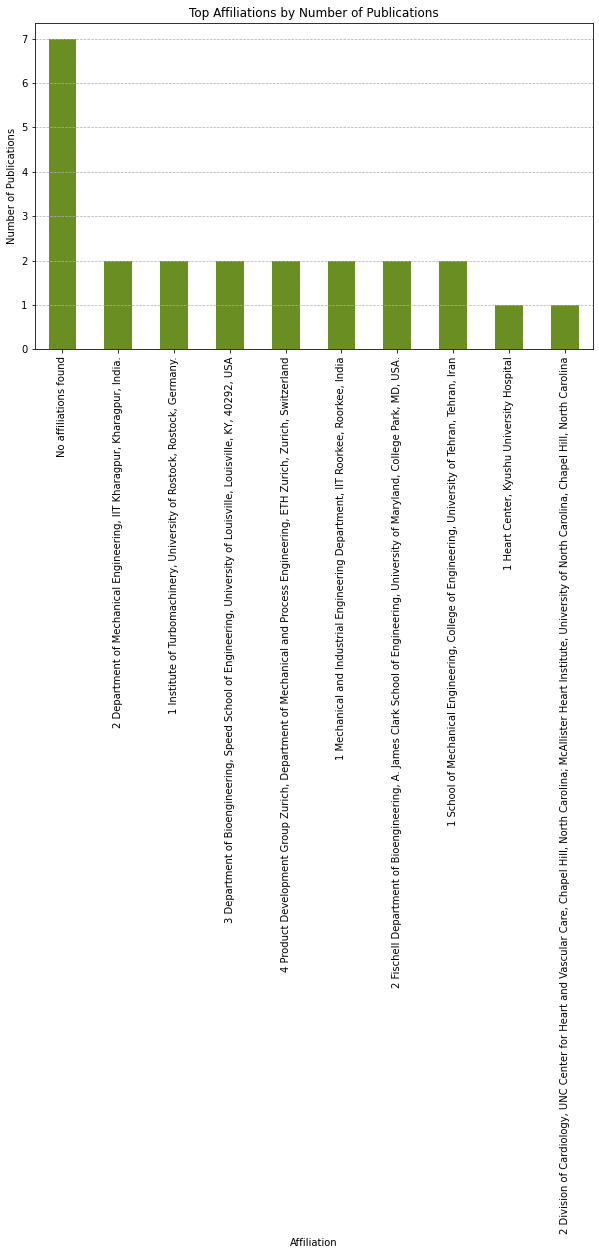

No affiliations found                                                                                                                                                                   7
2 Department of Mechanical Engineering, IIT Kharagpur, Kharagpur, India.                                                                                                                2
1 Institute of Turbomachinery, University of Rostock, Rostock, Germany.                                                                                                                 2
3 Department of Bioengineering, Speed School of Engineering, University of Louisville, Louisville, KY, 40292, USA                                                                       2
4 Product Development Group Zurich, Department of Mechanical and Process Engineering, ETH Zurich, Zurich, Switzerland                                                                   2
1 Mechanical and Industrial Engineering Department, IIT Roorkee, Roork

In [105]:
#Questions 3 Which affiliations or institutions have the highest number of publications?

# Combine all the affiliation columns into a single Series
affiliations_series = pd.Series(dtype=str)
for i in range(1, 9):  # There are 8 affiliation columns
    affiliations_series = affiliations_series.append(df[f'Affiliation_{i}'])

# Remove any "No affiliation" entries
affiliations_series = affiliations_series[affiliations_series != "No affiliation"]

# Count the occurrences of each unique affiliation
affiliations_count = affiliations_series.value_counts()

# Display the top affiliations or institutions
top_affiliations = affiliations_count.head(10)

# Plot the top affiliations or institutions
plt.figure(figsize=(10, 6))
top_affiliations.plot(kind='bar', color='olivedrab')
plt.title('Top Affiliations by Number of Publications')
plt.xlabel('Affiliation')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the data for exact numbers
top_affiliations



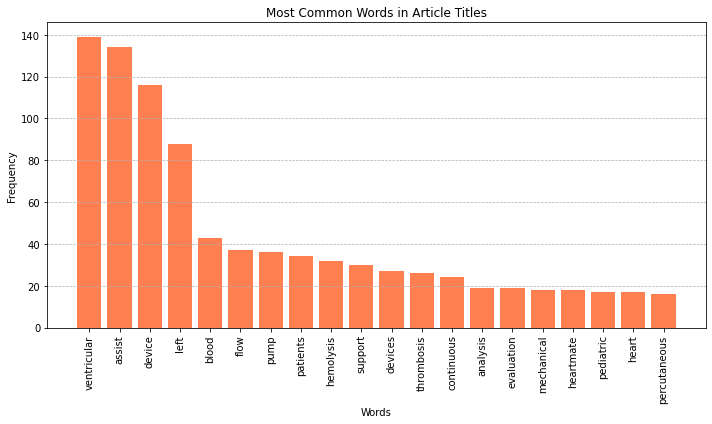

[('ventricular', 139),
 ('assist', 134),
 ('device', 116),
 ('left', 88),
 ('blood', 43),
 ('flow', 37),
 ('pump', 36),
 ('patients', 34),
 ('hemolysis', 32),
 ('support', 30),
 ('devices', 27),
 ('thrombosis', 26),
 ('continuous', 24),
 ('analysis', 19),
 ('evaluation', 19),
 ('mechanical', 18),
 ('heartmate', 18),
 ('pediatric', 17),
 ('heart', 17),
 ('percutaneous', 16)]

In [111]:
# Questions 4: "What are the most common themes or keywords present in the article titles?"

from collections import Counter
import re

# Function to clean and tokenize text
def clean_tokenize(text):
    # Convert to lower case
    text = text.lower()
    # Remove punctuation and split into tokens
    tokens = re.findall(r'\b\w+\b', text)
    return tokens

# List of English stop words
stop_words = set([
    'the', 'and', 'of', 'in', 'a', 'to', 'with', 'for', 'on', 'by', 'an', 'as', 'at',
    'from', 'is', 'that', 'its', 'it', 'this', 'these', 'are', 'was', 'were', 'which', 'or'
])

# Tokenize the titles and remove stop words
titles = df['Title']
tokens = [word for title in titles for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word
word_counts = Counter(tokens)

# Get the most common words
most_common_words = word_counts.most_common(20)

# Plot the most common words
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words), color='coral')
plt.title('Most Common Words in Article Titles')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common words and their counts
most_common_words

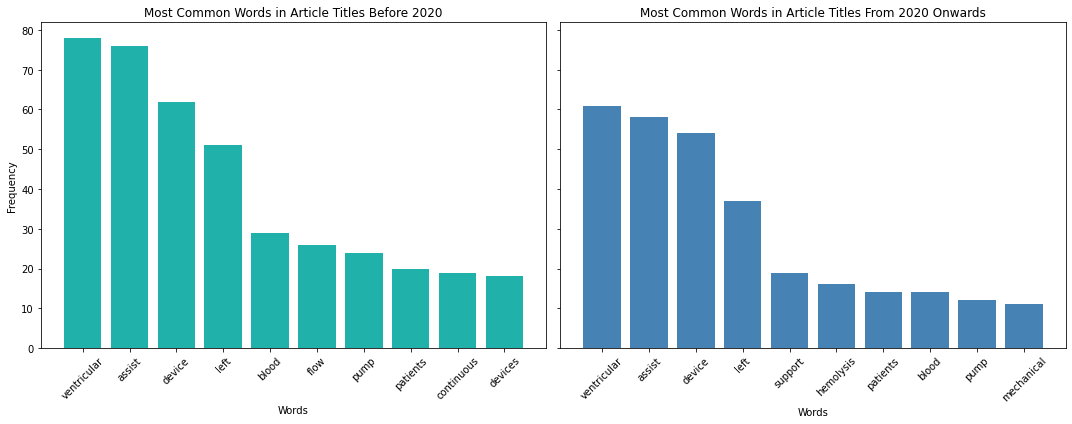

([('ventricular', 78),
  ('assist', 76),
  ('device', 62),
  ('left', 51),
  ('blood', 29),
  ('flow', 26),
  ('pump', 24),
  ('patients', 20),
  ('continuous', 19),
  ('devices', 18)],
 [('ventricular', 61),
  ('assist', 58),
  ('device', 54),
  ('left', 37),
  ('support', 19),
  ('hemolysis', 16),
  ('patients', 14),
  ('blood', 14),
  ('pump', 12),
  ('mechanical', 11)])

In [112]:
# Questions 5: "Are there emerging topics or trends in recent years?"


# perform the same analysis with the variable named 'df'
# Split the dataset into two time periods
before_2020_df = df[df['Publication_year'] < 2020]
from_2020_onwards_df = df[df['Publication_year'] >= 2020]

# Tokenize the titles and remove stop words for each period
tokens_before_2020_df = [word for title in before_2020_df['Title'] for word in clean_tokenize(title) if word not in stop_words]
tokens_from_2020_onwards_df = [word for title in from_2020_onwards_df['Title'] for word in clean_tokenize(title) if word not in stop_words]

# Count the frequency of each word for each period
word_counts_before_2020_df = Counter(tokens_before_2020_df)
word_counts_from_2020_onwards_df = Counter(tokens_from_2020_onwards_df)

# Get the most common words for each period
most_common_words_before_2020_df = word_counts_before_2020_df.most_common(10)
most_common_words_from_2020_onwards_df = word_counts_from_2020_onwards_df.most_common(10)

# Plot the most common words for each period
fig, axes = plt.subplots(1, 2, figsize=(15, 6), sharey=True)

# Before 2020
axes[0].bar(*zip(*most_common_words_before_2020_df), color='lightseagreen')
axes[0].set_title('Most Common Words in Article Titles Before 2020')
axes[0].set_xlabel('Words')
axes[0].set_ylabel('Frequency')
axes[0].tick_params(axis='x', rotation=45)

# From 2020 onwards
axes[1].bar(*zip(*most_common_words_from_2020_onwards_df), color='steelblue')
axes[1].set_title('Most Common Words in Article Titles From 2020 Onwards')
axes[1].set_xlabel('Words')
# axes[1].set_ylabel('Frequency')  # Y-axis is shared, so no need to set again
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

(most_common_words_before_2020_df, most_common_words_from_2020_onwards_df)


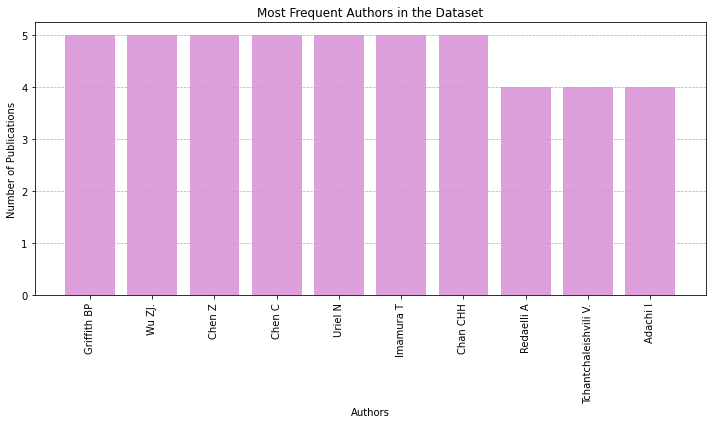

[('Griffith BP', 5),
 ('Wu ZJ.', 5),
 ('Chen Z', 5),
 ('Chen C', 5),
 ('Uriel N', 5),
 ('Imamura T', 5),
 ('Chan CHH', 5),
 ('Redaelli A', 4),
 ('Tchantchaleishvili V.', 4),
 ('Adachi I', 4)]

In [113]:
# Most frequent Authors

# Function to clean and split author names
def clean_split_authors(author_string):
    # Split author names by comma, assuming each author is separated by a comma
    authors = author_string.split(',')
    # Remove any leading/trailing whitespace from each author name
    authors = [author.strip() for author in authors]
    return authors

# Combine all authors into a single list
all_authors = []
for authors in df['Authors'].dropna():
    all_authors.extend(clean_split_authors(authors))

# Count the occurrences of each author
author_counts = Counter(all_authors)

# Get the most common authors
most_common_authors = author_counts.most_common(10)

# Plot the most common authors
plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_authors), color='plum')
plt.title('Most Frequent Authors in the Dataset')
plt.xlabel('Authors')
plt.ylabel('Number of Publications')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', linewidth=0.7)
plt.tight_layout()
plt.show()

# Return the most common authors and their counts
most_common_authors

In [116]:
import pandas as pd
from collections import Counter
import itertools

# Correcting the splitting of the 'Authors' column using a comma as the delimiter
author_lists = df['Authors'].str.split(',').dropna().tolist()

# Initialize an empty dictionary to store collaboration pairs and their counts
collaboration_counts = {}

# Loop through each list of authors
for authors in author_lists:
    # Trim whitespace and remove any trailing periods from author names
    authors_cleaned = [author.strip().rstrip('.') for author in authors]
    # Create unique pairs of authors for each publication
    for pair in itertools.combinations(authors_cleaned, 2):
        # Sort the pair to avoid duplicates (e.g., A-B and B-A are the same collaboration)
        sorted_pair = tuple(sorted(pair))
        # Count collaborations
        collaboration_counts[sorted_pair] = collaboration_counts.get(sorted_pair, 0) + 1

# Identify the most common collaborations
most_common_collaborations = Counter(collaboration_counts).most_common(10)

most_common_collaborations


[(('Griffith BP', 'Wu ZJ'), 5),
 (('Colombo PC', 'Topkara VK'), 4),
 (('Chen Z', 'Griffith BP'), 4),
 (('Chen Z', 'Wu ZJ'), 4),
 (('Bluestein D', 'Redaelli A'), 3),
 (('Consolo F', 'Redaelli A'), 3),
 (('Garan AR', 'Takeda K'), 3),
 (('Takayama H', 'Takeda K'), 3),
 (('Garan AR', 'Takayama H'), 3),
 (('Konnigk L', 'Torner B'), 3)]

<ipython-input-180-c0d708307452>:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


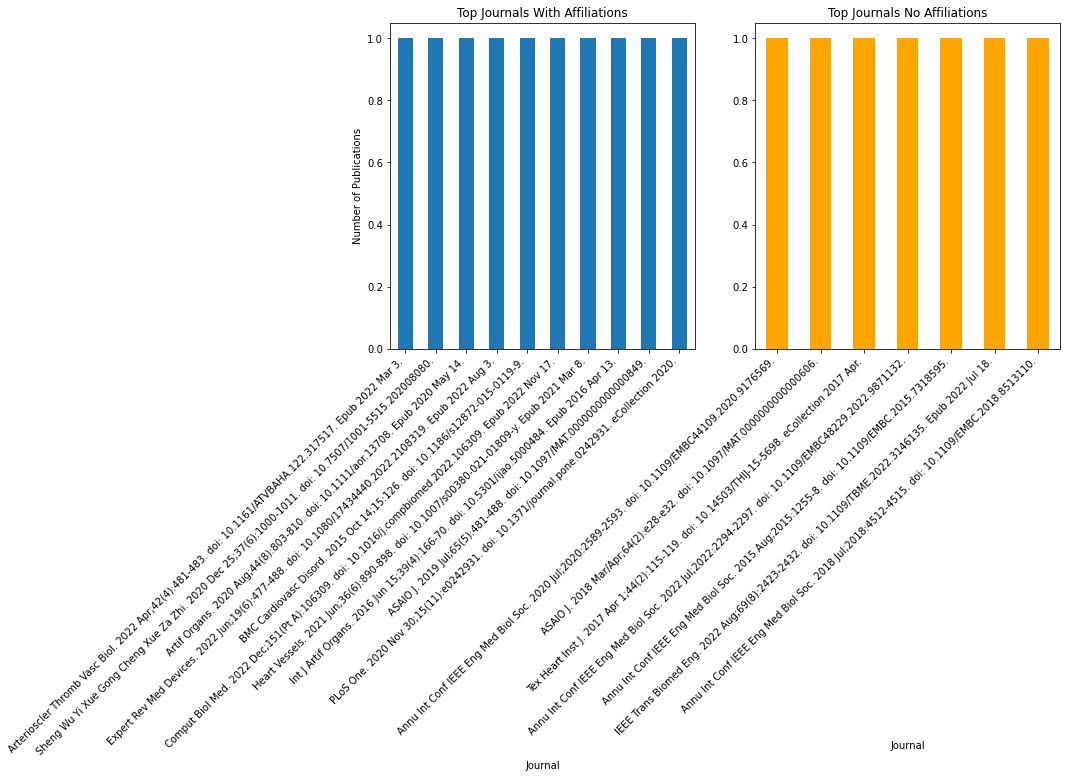

In [180]:
# Group by journal and count publications for each subset
journal_freq_with_affiliations = df_with_affiliations['Journal'].value_counts().head(10)
journal_freq_no_affiliations = df_no_affiliations['Journal'].value_counts().head(10)

# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
journal_freq_with_affiliations.plot(kind='bar')
plt.title('Top Journals With Affiliations')
plt.xlabel('Journal')
plt.ylabel('Number of Publications')
plt.xticks(rotation=45, ha='right')

plt.subplot(1, 2, 2)
journal_freq_no_affiliations.plot(kind='bar', color='orange')
plt.title('Top Journals No Affiliations')
plt.xlabel('Journal')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


<ipython-input-161-adbcc549a4d7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
<ipython-input-161-adbcc549a4d7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')


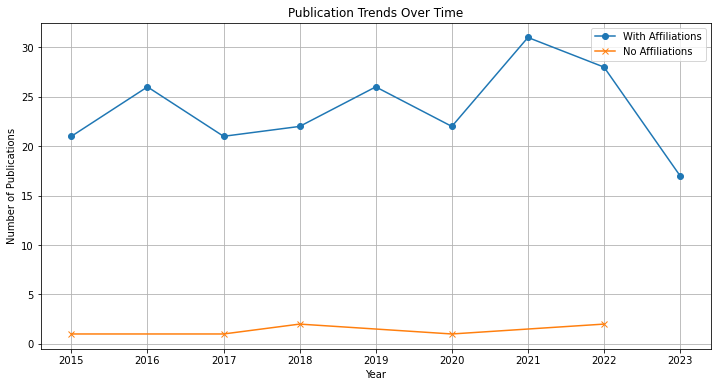

In [161]:
# Separate the dataset into two subsets
df_with_affiliations = df[~df['Affiliations'].str.lower().str.contains('no affiliations found')]
df_no_affiliations = df[df['Affiliations'].str.lower().str.contains('no affiliations found')]

# Convert 'Publication_year' to numeric
df_with_affiliations['Publication_year'] = pd.to_numeric(df_with_affiliations['Publication_year'], errors='coerce')
df_no_affiliations['Publication_year'] = pd.to_numeric(df_no_affiliations['Publication_year'], errors='coerce')

# Group by publication year and count publications
pub_trends_with_affiliations = df_with_affiliations.groupby('Publication_year').size()
pub_trends_no_affiliations = df_no_affiliations.groupby('Publication_year').size()

# Plotting
plt.figure(figsize=(12, 6))
pub_trends_with_affiliations.plot(label='With Affiliations', marker='o')
pub_trends_no_affiliations.plot(label='No Affiliations', marker='x')
plt.title('Publication Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Publications')
plt.legend()
plt.grid(True)
plt.show()
